In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
x,y=iris.data,iris.target 

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [19]:
knn = KNeighborsClassifier(n_neighbors=12)


In [20]:
%%time 
knn.fit(x_train,y_train)

CPU times: total: 0 ns
Wall time: 1.99 ms


KNeighborsClassifier(n_neighbors=12)

In [21]:
score = knn.score(x_test,y_test)

In [22]:
print(score)

0.9333333333333333


In [25]:
#tester les K 
neighbors = np.arange(1,101)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_acc[i]=knn.score(x_train,y_train)
    test_acc[i]=knn.score(x_test,y_test)
    

In [26]:
print(test_acc)

[0.93333333 0.93333333 0.93333333 0.96666667 0.96666667 0.96666667
 1.         0.93333333 0.96666667 0.96666667 1.         0.93333333
 0.96666667 0.96666667 0.96666667 0.93333333 1.         0.96666667
 0.96666667 0.93333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.93333333 0.96666667 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.9        0.93333333 0.93333333 0.93333333 0.9
 0.9        0.9        0.9        0.9        0.9        0.9
 0.9        0.9        0.9        0.9        0.9        0.9
 0.9        0.9        0.9        0.9        0.9        0.9
 0.9        0.9        0.9        0.9        0.9        0.86666667
 0.9        0.86666667 0.86666667 0.86666667 0.86666667 0.86666667
 0.86666667 0.56666667 0.56666667 0.56666667 0.56666667 0.56666667
 0.56666667 0.56666667 0.56666667 0.56666667 0.56666667 0.56666667
 0.56666667 0.56666667 0.56666667 0.56666667 0.5        0.4
 0.36666667 0.36666667 0.26666

In [23]:
knn = KNeighborsClassifier(n_neighbors=4)
 
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [24]:
score = knn.score(x_test,y_test)
print(score)

0.9666666666666667


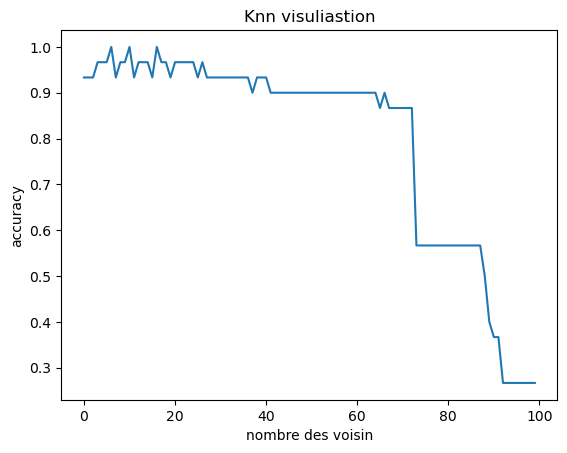

In [27]:
plt.plot(test_acc)
plt.title("Knn visuliastion")
plt.xlabel("nombre des voisin")
plt.ylabel("accuracy")
plt.show()

In [14]:
y_pred = knn.predict(x_test)

In [15]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 9  0  0]
 [ 0  8  0]
 [ 0  2 11]]


In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9333333333333333
Precision: 0.9333333333333332
Recall: 0.9487179487179488
F1 Score: 0.9351851851851851
